
Starting Predictive Maintenance Monitoring...
Press Ctrl+C to stop monitoring

Iteration 1

Sensor Readings:
ENGINE_RPM (): 1192
COOLANT_TEMPERATURE (): 97
ENGINE_LOAD (): 32
FUEL_TANK (): 73
CONTROL_MODULE_VOLTAGE (): 12.49
INTAKE_AIR_TEMP (): 47
LONG_TERM_FUEL_TRIM_BANK_1 (): -1.62

Prediction Results:

Anomaly Detection:
Status: Anomaly

Feature Contributions to Anomaly Score:
  ENGINE_LOAD (): 2.7821
  FUEL_TANK (): 2.0580
  ENGINE_RPM (): 1.7443
  COOLANT_TEMPERATURE (): 0.1540

Fault Detection:
Status: Faulty
Confidence: 86.67%



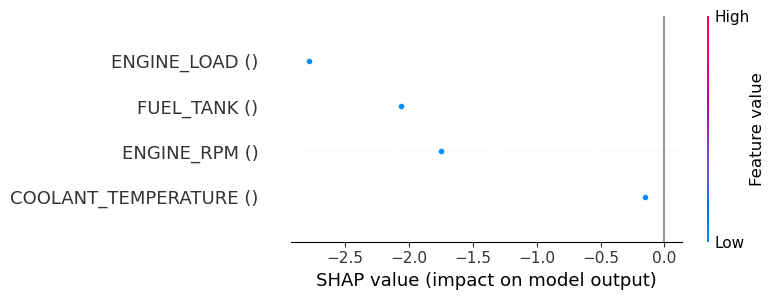


Iteration 2

Sensor Readings:
ENGINE_RPM (): 2158
COOLANT_TEMPERATURE (): 77
ENGINE_LOAD (): 70
FUEL_TANK (): 77
CONTROL_MODULE_VOLTAGE (): 13.66
INTAKE_AIR_TEMP (): 23
LONG_TERM_FUEL_TRIM_BANK_1 (): 3.48

Prediction Results:

Anomaly Detection:
Status: Anomaly

Feature Contributions to Anomaly Score:
  ENGINE_LOAD (): 2.7821
  FUEL_TANK (): 2.0580
  ENGINE_RPM (): 1.7443
  COOLANT_TEMPERATURE (): 0.1540

Fault Detection:
Status: Faulty
Confidence: 96.0%



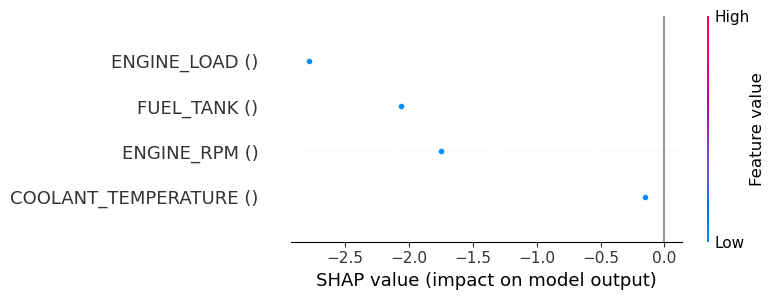


Iteration 3

Sensor Readings:
ENGINE_RPM (): 3269
COOLANT_TEMPERATURE (): 82
ENGINE_LOAD (): 67
FUEL_TANK (): 22
CONTROL_MODULE_VOLTAGE (): 13.43
INTAKE_AIR_TEMP (): 22
LONG_TERM_FUEL_TRIM_BANK_1 (): -0.43

Prediction Results:

Anomaly Detection:
Status: Anomaly

Feature Contributions to Anomaly Score:
  ENGINE_LOAD (): 2.7821
  FUEL_TANK (): 2.0580
  ENGINE_RPM (): 1.7443
  COOLANT_TEMPERATURE (): 0.1540

Fault Detection:
Status: Faulty
Confidence: 98.0%



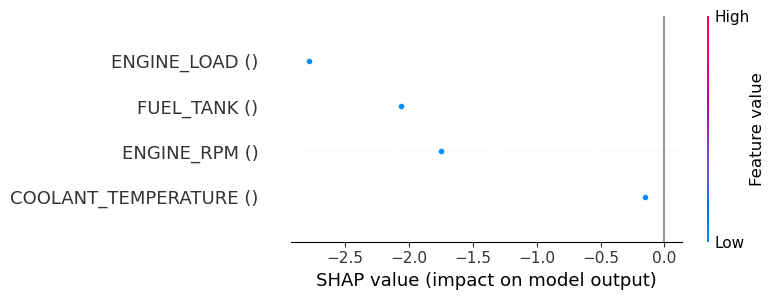


Iteration 4

Sensor Readings:
ENGINE_RPM (): 2619
COOLANT_TEMPERATURE (): 119
ENGINE_LOAD (): 62
FUEL_TANK (): 28
CONTROL_MODULE_VOLTAGE (): 14.78
INTAKE_AIR_TEMP (): 29
LONG_TERM_FUEL_TRIM_BANK_1 (): 1.8

Prediction Results:

Anomaly Detection:
Status: Anomaly

Feature Contributions to Anomaly Score:
  ENGINE_LOAD (): 2.7821
  FUEL_TANK (): 2.0580
  ENGINE_RPM (): 1.7443
  COOLANT_TEMPERATURE (): 0.1540

Fault Detection:
Status: Faulty
Confidence: 96.0%



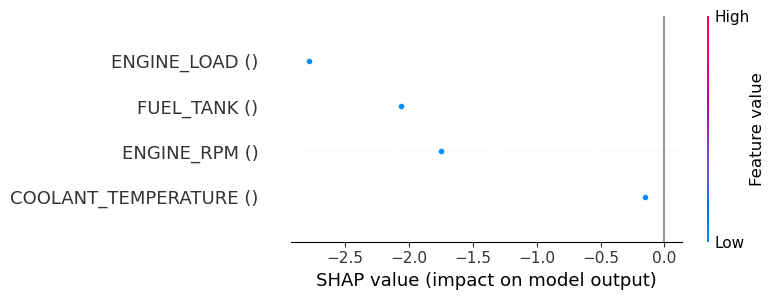


Iteration 5

Sensor Readings:
ENGINE_RPM (): 1180
COOLANT_TEMPERATURE (): 65
ENGINE_LOAD (): 27
FUEL_TANK (): 40
CONTROL_MODULE_VOLTAGE (): 12.3
INTAKE_AIR_TEMP (): 38
LONG_TERM_FUEL_TRIM_BANK_1 (): 1.82

Prediction Results:

Anomaly Detection:
Status: Anomaly

Feature Contributions to Anomaly Score:
  ENGINE_LOAD (): 2.7821
  FUEL_TANK (): 2.0580
  ENGINE_RPM (): 1.7443
  COOLANT_TEMPERATURE (): 0.1540

Fault Detection:
Status: Faulty
Confidence: 96.0%



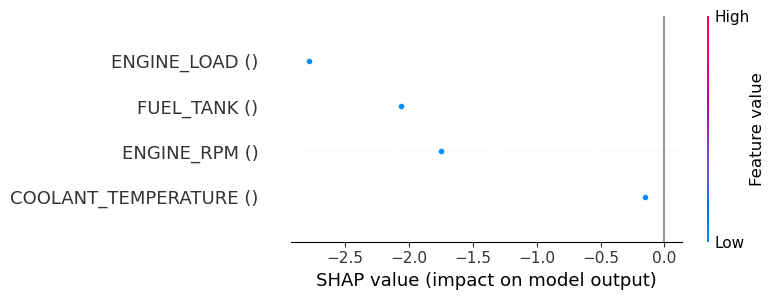


Iteration 6

Sensor Readings:
ENGINE_RPM (): 3698
COOLANT_TEMPERATURE (): 97
ENGINE_LOAD (): 40
FUEL_TANK (): 76
CONTROL_MODULE_VOLTAGE (): 14.08
INTAKE_AIR_TEMP (): 40
LONG_TERM_FUEL_TRIM_BANK_1 (): 4.71

Monitoring stopped by user

Monitoring session ended


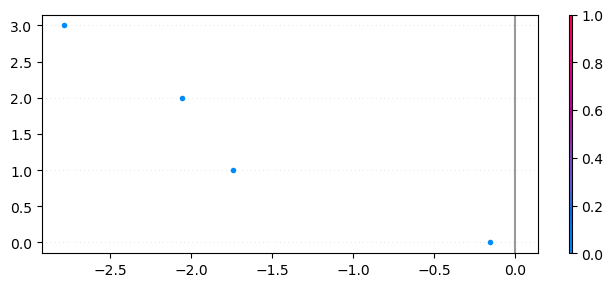

In [69]:
import joblib
import numpy as np
import pandas as pd
import shap
import random
import warnings
import matplotlib.pyplot as plt
from time import sleep

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load models
models = {
    "fault_detection": joblib.load(r"C:\Users\Manibharathi\Downloads\AI-based-Predictive-Maintenance\models\FP_eng_cond(live).pkl"),
    "anomaly_detection": joblib.load(r"C:\Users\Manibharathi\Downloads\AI-based-Predictive-Maintenance\models\engine_anomaly_detection.pkl"),
}

# Features for each model
features = {
    "fault_detection": ['COOLANT_TEMPERATURE ()', 'LONG_TERM_FUEL_TRIM_BANK_1 ()', 'INTAKE_AIR_TEMP ()', 'CONTROL_MODULE_VOLTAGE ()'],
    "anomaly_detection": ['ENGINE_RPM ()', 'COOLANT_TEMPERATURE ()', 'ENGINE_LOAD ()', 'FUEL_TANK ()'],
}

def generate_random_sensor_data():
    """Generate random sensor data within realistic ranges"""
    return {
        # Anomaly detection features
        "ENGINE_RPM ()": random.randint(800, 4000),
        "COOLANT_TEMPERATURE ()": random.randint(60, 120),
        "ENGINE_LOAD ()": random.randint(20, 100),
        "FUEL_TANK ()": random.randint(10, 100),
        # Fault detection features
        "CONTROL_MODULE_VOLTAGE ()": round(random.uniform(11.0, 15.0), 2),
        "INTAKE_AIR_TEMP ()": random.randint(20, 50),
        "LONG_TERM_FUEL_TRIM_BANK_1 ()": round(random.uniform(-10, 10), 2)
    }

def explain_anomaly_detection(model, input_data, feature_names):
    """Calculate SHAP values specifically for anomaly detection"""
    try:
        # Create background dataset
        background_data = pd.DataFrame([input_data.iloc[0].tolist()]*5, columns=feature_names)
        
        # Initialize SHAP explainer
        explainer = shap.TreeExplainer(model)
        
        # Calculate SHAP values
        shap_values = explainer.shap_values(input_data)
        
        # Create feature importance dictionary
        importance_dict = {}
        
        # Handle different SHAP value formats
        if isinstance(shap_values, list):
            # For models that return a list of arrays (like RandomForest)
            importance_values = np.abs(shap_values[1][0])
        else:
            # For models that return a single array
            importance_values = np.abs(shap_values[0])
        
        # Create and sort feature importance dictionary
        for feat, imp in zip(feature_names, importance_values):
            importance_dict[feat] = float(imp)
        
        # Create SHAP summary plot
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, input_data, feature_names=feature_names, show=False)
        plt.tight_layout()
        
        return {
            'importance_scores': dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)),
            'shap_values': shap_values,
            'feature_names': feature_names
        }
        
    except Exception as e:
        print(f"Error calculating SHAP values: {str(e)}")
        return {}

def make_predictions(sensor_data):
    """Make predictions using both models"""
    results = {}
    
    try:
        # Prepare input data for anomaly detection
        anomaly_features = features["anomaly_detection"]
        anomaly_input = pd.DataFrame([sensor_data], columns=anomaly_features)
        
        # Get anomaly prediction
        anomaly_model = models["anomaly_detection"]
        anomaly_pred = anomaly_model.predict(anomaly_input)[0]
        
        # Get SHAP explanations for anomaly detection
        shap_results = explain_anomaly_detection(anomaly_model, anomaly_input, anomaly_features)
        
        # Format anomaly results
        results["Anomaly Detection"] = {
            "status": "Anomaly" if anomaly_pred == -1 else "Normal",
            "shap_values": shap_results.get('importance_scores', {}),
            "raw_prediction": anomaly_pred
        }
        
        # Get fault detection prediction
        fault_features = features["fault_detection"]
        fault_input = pd.DataFrame([sensor_data], columns=fault_features)
        
        fault_model = models["fault_detection"]
        fault_pred = fault_model.predict(fault_input)[0]
        
        # Get fault detection probabilities
        # Comment out these three lines if you don't want confidence scores
        fault_proba = fault_model.predict_proba(fault_input)[0]
        confidence = fault_proba[1] if fault_pred == 1 else fault_proba[0]
        confidence_percentage = round(confidence * 100, 2)
        
        # Format fault results
        results["Fault Detection"] = {
            "status": "Faulty" if fault_pred == 1 else "Normal",
            "raw_prediction": fault_pred,
            # Comment out this line if you don't want confidence scores
            "confidence": confidence_percentage
        }
        
    except Exception as e:
        print(f"Error in predictions: {str(e)}")
        results["error"] = str(e)
    
    return results

def format_results(results):
    """Format the results with SHAP values for anomaly detection and confidence for fault detection"""
    output = "\nPrediction Results:\n" + "="*50 + "\n"
    
    if "error" in results:
        return f"Error occurred: {results['error']}"
    
    # Format anomaly detection results
    if "Anomaly Detection" in results:
        anomaly_result = results["Anomaly Detection"]
        output += "\nAnomaly Detection:\n"
        output += f"Status: {anomaly_result['status']}\n"
        
        if anomaly_result.get('shap_values'):
            output += "\nFeature Contributions to Anomaly Score:\n"
            for feature, importance in anomaly_result['shap_values'].items():
                output += f"  {feature}: {importance:.4f}\n"
    
    # Format fault detection results
    if "Fault Detection" in results:
        fault_result = results["Fault Detection"]
        output += "\nFault Detection:\n"
        output += f"Status: {fault_result['status']}\n"
        # Comment out this line if you don't want confidence scores
        output += f"Confidence: {fault_result['confidence']}%\n"
    
    return output

def run_predictive_maintenance():
    """Main function to run the predictive maintenance system"""
    try:
        print("\nStarting Predictive Maintenance Monitoring...")
        print("Press Ctrl+C to stop monitoring")
        print("="*50)
        
        iteration = 1
        while True:
            print(f"\nIteration {iteration}")
            print("="*50)
            
            # Generate and display sensor data
            sensor_data = generate_random_sensor_data()
            print("\nSensor Readings:")
            for key, value in sensor_data.items():
                print(f"{key}: {value}")
            
            # Make predictions and get results
            results = make_predictions(sensor_data)
            
            # Display formatted results
            print(format_results(results))
            
            # Display SHAP plot if available
            plt.show()
            
            # Close all plots and add delay
            plt.close('all')
            sleep(2)
            
            iteration += 1
            
    except KeyboardInterrupt:
        print("\nMonitoring stopped by user")
    except Exception as e:
        print(f"\nAn error occurred: {str(e)}")
    finally:
        print("\nMonitoring session ended")

if __name__ == "__main__":
    run_predictive_maintenance()